In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Activation, Dense, Lambda,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [38]:
from keras.utils import to_categorical

In [3]:
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dir = 'dataset/training_set/'
validation_dir = 'dataset/test_set/'
test_dir = 'dataset/test_set/'

In [7]:
! ls dataset/training_set/

cats dogs


In [5]:
image_w = 128
image_h = 128

In [9]:
train_generator = datagen.flow_from_directory(train_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             classes=['cats', 'dogs'])

Found 8000 images belonging to 2 classes.


In [10]:
validation_generator = datagen.flow_from_directory(test_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                                classes=['cats', 'dogs'])

Found 2000 images belonging to 2 classes.


In [11]:
test_generator = datagen.flow_from_directory(test_dir,
                                             target_size = (image_w, image_h),
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                            classes=['cats','dogs'])

Found 2000 images belonging to 2 classes.


In [12]:
def LeNet(width, height, channels, output):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels)))
    
#     model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), input_shape=(width, height, channels))

    model.add(Activation('relu'))
    
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(2,2)))
    
    model.add(Activation('relu'))
    
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(100))
    
    model.add(Activation('relu'))
    
    model.add(Dense(output))
    model.add(Activation('softmax'))
    
    return model

In [13]:
train_generator.samples

8000

In [14]:
EPOCHS = 10
train_sample = train_generator.samples
validation_sample = validation_generator.samples
test_sample = test_generator.samples

In [15]:
model = LeNet(image_w, image_h, 3, 2)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [17]:
batch_size = train_generator.batch_size

In [18]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['accuracy'])

In [19]:
history = model.fit_generator(train_generator,
                   steps_per_epoch = train_sample//batch_size,
                   epochs = EPOCHS,
                   validation_data = validation_generator,
                   validation_steps = validation_sample//batch_size)

Epoch 1/10
250/250 [==============================] - 115s 460ms/step - loss: 0.2474 - acc: 0.5433 - val_loss: 0.2318 - val_acc: 0.6316
Epoch 2/10
250/250 [==============================] - 107s 428ms/step - loss: 0.2149 - acc: 0.6555 - val_loss: 0.2051 - val_acc: 0.6875
Epoch 3/10
250/250 [==============================] - 102s 409ms/step - loss: 0.1879 - acc: 0.7185 - val_loss: 0.1803 - val_acc: 0.7308
Epoch 4/10
250/250 [==============================] - 104s 415ms/step - loss: 0.1630 - acc: 0.7610 - val_loss: 0.1704 - val_acc: 0.7480
Epoch 5/10
250/250 [==============================] - 105s 420ms/step - loss: 0.1482 - acc: 0.7884 - val_loss: 0.1773 - val_acc: 0.7450
Epoch 6/10
250/250 [==============================] - 122s 487ms/step - loss: 0.1288 - acc: 0.8193 - val_loss: 0.1807 - val_acc: 0.7490
Epoch 7/10
250/250 [==============================] - 111s 445ms/step - loss: 0.1074 - acc: 0.8526 - val_loss: 0.1641 - val_acc: 0.7747
Epoch 8/10
250/250 [============================

In [20]:
ls

CatDog.ipynb  dataset/      model.h5


In [21]:
model.save_weights('model_cnn.h5')

In [22]:
ls

CatDog.ipynb  dataset/      model.h5      model_cnn.h5


In [23]:
model.load_weights('model_cnn.h5')

In [24]:
%matplotlib inline

In [25]:
img = load_img('dataset/training_set/cats/cat.1000.jpg', target_size=(image_w, image_h))

In [45]:
img = load_img('dataset/training_set/dogs/dog.100.jpg', target_size=(image_w, image_h))

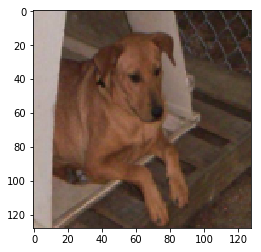

In [46]:
plt.imshow(img)

In [47]:
img = np.array(img)/255

In [48]:
img.shape

(128, 128, 3)

In [49]:
img = np.expand_dims(img, axis = 0)

In [50]:
img.shape

(1, 128, 128, 3)

In [51]:
model.predict(img)

array([[0.08232582, 0.9176741 ]], dtype=float32)

In [52]:
cat = {1, 0}
dog = {0, 1}

In [57]:
opt = model.predict_classes(img)

1/1 [==============================] - 0s 7ms/step


In [58]:
opt

array([1])

In [56]:
output_dict = {
    0 : "cat",
    1 : "dog"
}

In [60]:
print("We found the image to be that of a {}".format(output_dict[opt[0]]))

We found the image to be that of a dog


In [54]:
model.predict_classes(img)

1/1 [==============================] - 0s 7ms/step


array([1])

In [55]:
to_categorical(model.predict_classes(img), num_classes=2)

1/1 [==============================] - 0s 7ms/step


array([[0., 1.]])